## Ecommerce Analysis

## Extracting text from twitter

In [2]:
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import string
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from wordcloud import STOPWORDS
from nltk import ConditionalFreqDist
ConditionalFreqDist()
from nltk import FreqDist
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

%matplotlib inline

In [3]:
emoji_pattern = re.compile("["
                    u"\U0001F600-\U0001F64F"  # emoticons
                    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                    u"\U0001F680-\U0001F6FF"  # transport & map symbols
                    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                    u"\U00002702-\U000027B0"
                    u"\U000024C2-\U0001F251"
                    "]+", flags=re.UNICODE)

In [4]:
#clean the text
def cleanTxt(texts):
    texts = texts.lower()
    texts = re.sub(r'@[A-Za-z0-9]+', '', texts)  #removed @
    #texts = re.sub(r'#', '', texts) #removing the '#' symbol
    texts = re.sub(r'RT[\s]+','',texts)  #removing RT
    texts = re.sub('https?://\S+|www\.\S+', '', texts)  #remove the hyper link
    texts = re.sub('\[.*?\]', '', texts)
    texts = re.sub('<.*?>+', '', texts)
    #texts = re.sub('[%s]' % re.escape(string.punctuation), '', texts)
    texts = re.sub('\n', '', texts)
    texts = re.sub('\w*\d\w*', '', texts)
    texts = emoji_pattern.sub(r'', texts)
    texts = re.sub(r'\.+$', '', texts)
    texts = re.sub(r'amazon', '', texts)
    texts = re.sub(r'flipkart', '', texts)
    texts = re.sub(r'snapdeal', '', texts)
    texts = re.sub(r'twitter', '', texts)
    texts = re.sub(r'india', '', texts)
    texts = re.sub(r'prime', '', texts)
    texts = re.sub(r'indian', '', texts)
    texts = re.sub(r'online', '', texts)
    texts = re.sub(r'film', '', texts)
    texts = re.sub(r'view', '', texts)
    texts = re.sub(r'video', '', texts)
    texts = re.sub(r'will', '', texts)
    texts = re.sub(r'tamil trailer', '', texts)
    
    return str(texts)

## Importing Dataset

In [5]:
# read the data ## Amazon India
df = pd.read_csv(r"C:\Users\ASUS\abhi\Twitter sentiment analysis\amazon.csv")

In [6]:
# read the data ## Flipkart
df1 = pd.read_csv(r"C:\Users\ASUS\abhi\Twitter sentiment analysis\flipkart.csv")

In [7]:
# read the data ## Snapdeal
df2 = pd.read_csv(r"C:\Users\ASUS\abhi\Twitter sentiment analysis\snapdeal.csv")

In [8]:
# amazon dataset
df.head()

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status
0,agntsmith007,NaN,TweetDeck,NaN,12/14/2020 13:34,True,59,@India_Progress Kinda wrong. World runs on Ama...,1,False
1,shyamsu12147458,NaN,Twitter Web App,NaN,12/14/2020 13:28,False,9,@JeffBezos I'm from india sir your https://t....,0,False
2,globallifechurc,St.thomas,Twitter Web App,NaN,12/14/2020 13:23,True,3250,Before making your goals for the year 2021 re...,0,False
3,CNBCTV18News,NaN,Twitter Media Studio,NaN,12/14/2020 13:23,True,202,*Ola to set up world's largest e-scooter facto...,0,False
4,chandramani1991,NaN,Twitter for Android,NaN,12/14/2020 13:22,False,492,@amazonIN \nIs allowed to sell made in Chinese...,0,False


In [9]:
# Flipkart dataset
df1.head()

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status
0,LotiyaPathaan,"Delhi, India",Twitter for Android,NaN,2020-12-22 13:09:56,True,126,@flipkartsupport Just parroted replies with no...,0,False
1,Janice21833065,NaN,Twitter Web App,NaN,2020-12-22 13:09:12,False,3,https://t.co/KzaULfNmYG\n\nMulticolor Men &amp...,0,False
2,getfreedeal,India,getfreedeals,NaN,2020-12-22 13:09:11,False,64,Home and Bazaar Solid Wood Home Temple upto 83...,0,False
3,k91135328,NaN,Twitter for Android,NaN,2020-12-22 13:09:01,True,539,@Flipkart This is thief company,0,False
4,mohankrishnak1,banglore,Twitter Web App,NaN,2020-12-22 13:08:56,False,269,@IndiaPOCO @Flipkart Poor optimization is soft...,0,False


In [10]:
# Snapdeal dataset
df2.head()

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status
0,samyoga_20,ಕನ್ನಡ ನೆಲ- ಕರ್ನಾಟಕ,Twitter for Android,NaN,2020-12-22 13:37:04,False,543,@AmazonHelp No use as I was expecting the item...,0,False
1,panasiabiz,NaN,Revive Social App,NaN,2020-12-22 13:11:56,False,165,Intex Aqua Star L with Lollipop available on S...,0,False
2,thecouono,India,Twitter for Android,NaN,2020-12-22 13:04:05,False,0,Snapdeal partners with NPCI to enable doorstep...,0,False
3,SadiiyaMemon,"London, England",Twitter for Android,NaN,2020-12-22 12:38:36,True,110,@eyefarhan @myntra @snapdeal @amazon @Walmart ...,0,False
4,Snapdeal_Help,India,OneDirect Suite - P,NaN,2020-12-22 11:56:50,False,1418,@Dhineshsudhakar Hi! Sorry to disappoint you. ...,0,False


# Understand the Problem Statement
Ecommerce company want to start operation in India, they want sentiment of competitors customers to make business decision before entring Indian market.
* Amazon India
* Flipkart
* Snapdeal

## Tweets Preprocessing and Cleaning

In [11]:
#cleaning the text
df['text'] = df['text'].apply(cleanTxt)

In [12]:
#cleaning the text
df1['text'] = df1['text'].apply(cleanTxt)

In [13]:
#cleaning the text
df2['text'] = df2['text'].apply(cleanTxt)

In [14]:
#stop words
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [15]:
#stop words
df1['text'] = df1['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [16]:
#stop words
df2['text'] = df2['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [17]:
# amazon info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user              3100 non-null   object
 1   location          2324 non-null   object
 2   source            2716 non-null   object
 3   place             42 non-null     object
 4   created_at        3100 non-null   object
 5   geo_enabled       3100 non-null   bool  
 6   friends_count     3100 non-null   int64 
 7   text              3100 non-null   object
 8   retweet_count     3100 non-null   int64 
 9   retweeted_status  3100 non-null   bool  
dtypes: bool(2), int64(2), object(6)
memory usage: 199.9+ KB


In [18]:
# flipkart info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user              3100 non-null   object
 1   location          1924 non-null   object
 2   source            3067 non-null   object
 3   place             49 non-null     object
 4   created_at        3100 non-null   object
 5   geo_enabled       3100 non-null   bool  
 6   friends_count     3100 non-null   int64 
 7   text              3100 non-null   object
 8   retweet_count     3100 non-null   int64 
 9   retweeted_status  3100 non-null   bool  
dtypes: bool(2), int64(2), object(6)
memory usage: 199.9+ KB


In [19]:
# snapdeal info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user              525 non-null    object
 1   location          381 non-null    object
 2   source            524 non-null    object
 3   place             14 non-null     object
 4   created_at        525 non-null    object
 5   geo_enabled       525 non-null    bool  
 6   friends_count     525 non-null    int64 
 7   text              525 non-null    object
 8   retweet_count     525 non-null    int64 
 9   retweeted_status  525 non-null    bool  
dtypes: bool(2), int64(2), object(6)
memory usage: 34.0+ KB


In [20]:
#show the amazon cleaned text
df.head()

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status
0,agntsmith007,NaN,TweetDeck,NaN,12/14/2020 13:34,True,59,_progress kinda wrong. world runs services mic...,1,False
1,shyamsu12147458,NaN,Twitter Web App,NaN,12/14/2020 13:28,False,9,from your taken money returned mobil phone,0,False
2,globallifechurc,St.thomas,Twitter Web App,NaN,12/14/2020 13:23,True,3250,"before making your goals year read book ""sweet...",0,False
3,CNBCTV18News,NaN,Twitter Media Studio,NaN,12/14/2020 13:23,True,202,*ola world's largest e-scooter factory tamil n...,0,False
4,chandramani1991,NaN,Twitter for Android,NaN,12/14/2020 13:22,False,492,allowed sell made chinese mobile,0,False


In [21]:
#show the flipkart cleaned text
df1.head()

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status
0,LotiyaPathaan,"Delhi, India",Twitter for Android,NaN,2020-12-22 13:09:56,True,126,just parroted replies with substance them. tha...,0,False
1,Janice21833065,NaN,Twitter Web App,NaN,2020-12-22 13:09:12,False,3,multicolor &amp; women sling &amp; women sling,0,False
2,getfreedeal,India,getfreedeals,NaN,2020-12-22 13:09:11,False,64,home bazaar solid wood home temple upto,0,False
3,k91135328,NaN,Twitter for Android,NaN,2020-12-22 13:09:01,True,539,this thief company,0,False
4,mohankrishnak1,banglore,Twitter Web App,NaN,2020-12-22 13:08:56,False,269,poor optimization software poco launcher..poco...,0,False


In [22]:
#show the snapdeal cleaned text
df2.head()

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status
0,samyoga_20,ಕನ್ನಡ ನೆಲ- ಕರ್ನಾಟಕ,Twitter for Android,NaN,2020-12-22 13:37:04,False,543,expecting item today tomorrow last. it's worth...,0,False
1,panasiabiz,NaN,Revive Social App,NaN,2020-12-22 13:11:56,False,165,intex aqua star with lollipop available,0,False
2,thecouono,India,Twitter for Android,NaN,2020-12-22 13:04:05,False,0,partners with npci enable doorstep code paymen...,0,False
3,SadiiyaMemon,"London, England",Twitter for Android,NaN,2020-12-22 12:38:36,True,110,_doucette,0,False
4,Snapdeal_Help,India,OneDirect Suite - P,NaN,2020-12-22 11:56:50,False,1418,sorry disappoint you. please “private message”...,0,False


## Tokenization
Now we will tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, and tokenization is the 
process of splitting a string of text into tokens.

In [23]:
# Amazon India
tokenized_tweet = df['text'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [_progress, kinda, wrong., world, runs, servic...
1    [from, your, taken, money, returned, mobil, ph...
2    [before, making, your, goals, year, read, book...
3    [*ola, world's, largest, e-scooter, factory, t...
4               [allowed, sell, made, chinese, mobile]
Name: text, dtype: object

In [24]:
# Flipkart 
tokenized_tweet1 = df1['text'].apply(lambda x: x.split())
tokenized_tweet1.head()

0    [just, parroted, replies, with, substance, the...
1    [multicolor, &amp;, women, sling, &amp;, women...
2      [home, bazaar, solid, wood, home, temple, upto]
3                               [this, thief, company]
4    [poor, optimization, software, poco, launcher....
Name: text, dtype: object

In [25]:
# Snapdeal
tokenized_tweet2 = df2['text'].apply(lambda x: x.split())
tokenized_tweet2.head()

0    [expecting, item, today, tomorrow, last., it's...
1       [intex, aqua, star, with, lollipop, available]
2    [partners, with, npci, enable, doorstep, code,...
3                                          [_doucette]
4    [sorry, disappoint, you., please, “private, me...
Name: text, dtype: object

## Stemming
Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example, 
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”

In [26]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [27]:
# Amazon India
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])  #stemming
tokenized_tweet

0       [_progress, kinda, wrong., world, run, servic,...
1        [from, your, taken, money, return, mobil, phone]
2       [befor, make, your, goal, year, read, book, "s...
3       [*ola, world', largest, e-scoot, factori, tami...
4                      [allow, sell, made, chines, mobil]
                              ...                        
3095    [echo, gen),, echo, gen),, echo, gen), with, c...
3096                                       [deal, price:]
3097                                       [deal, price:]
3098              [‘watch, party’, here’, gadget, inform]
3099    [bosch, sixth, season, releas, april., when, c...
Name: text, Length: 3100, dtype: object

In [28]:
# Flipkart
tokenized_tweet1 = tokenized_tweet1.apply(lambda x: [stemmer.stem(i) for i in x])  #stemming
tokenized_tweet1

0       [just, parrot, repli, with, substanc, them., t...
1       [multicolor, &amp;, women, sling, &amp;, women...
2          [home, bazaar, solid, wood, home, templ, upto]
3                                   [thi, thief, compani]
4       [poor, optim, softwar, poco, launcher..poco, n...
                              ...                        
3095    [tri, that, should, carri, machin, servic, cen...
3096    [it’, good, habit, post, honest, product, (bes...
3097                             [brand, beauti, minimum]
3098    [ensur, that, your, account, inform, safe,, pl...
3099    [there, critic, offer,, alreadi, complain, the...
Name: text, Length: 3100, dtype: object

In [29]:
# Snapdeal
tokenized_tweet2 = tokenized_tweet2.apply(lambda x: [stemmer.stem(i) for i in x])  #stemming
tokenized_tweet2

0      [expect, item, today, tomorrow, last., it', wo...
1             [intex, aqua, star, with, lollipop, avail]
2      [partner, with, npci, enabl, doorstep, code, p...
3                                             [_doucett]
4      [sorri, disappoint, you., pleas, “privat, mess...
                             ...                        
520    [we'v, respond, privat, message,, pleas, check...
521    [_help, person, call, claim, employe, base, ja...
522    [pleas, respond, phone, call/email/sms/lett, c...
523    [there, have, receiv, messag, regard, have, sw...
524    [take, break, stuff, your, belli, with, good, ...
Name: text, Length: 525, dtype: object

In [30]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df['text'] = tokenized_tweet

In [31]:
for i in range(len(tokenized_tweet1)):
    tokenized_tweet1[i] = ' '.join(tokenized_tweet1[i])

df1['text'] = tokenized_tweet1

In [32]:
for i in range(len(tokenized_tweet2)):
    tokenized_tweet2[i] = ' '.join(tokenized_tweet2[i])

df2['text'] = tokenized_tweet2

In [33]:
# Amazon India
df.head()

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status
0,agntsmith007,NaN,TweetDeck,NaN,12/14/2020 13:34,True,59,_progress kinda wrong. world run servic micros...,1,False
1,shyamsu12147458,NaN,Twitter Web App,NaN,12/14/2020 13:28,False,9,from your taken money return mobil phone,0,False
2,globallifechurc,St.thomas,Twitter Web App,NaN,12/14/2020 13:23,True,3250,"befor make your goal year read book ""sweet aro...",0,False
3,CNBCTV18News,NaN,Twitter Media Studio,NaN,12/14/2020 13:23,True,202,*ola world' largest e-scoot factori tamil nadu...,0,False
4,chandramani1991,NaN,Twitter for Android,NaN,12/14/2020 13:22,False,492,allow sell made chines mobil,0,False


In [34]:
# Flipkart
df1.head()

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status
0,LotiyaPathaan,"Delhi, India",Twitter for Android,NaN,2020-12-22 13:09:56,True,126,just parrot repli with substanc them. that' ev...,0,False
1,Janice21833065,NaN,Twitter Web App,NaN,2020-12-22 13:09:12,False,3,multicolor &amp; women sling &amp; women sling,0,False
2,getfreedeal,India,getfreedeals,NaN,2020-12-22 13:09:11,False,64,home bazaar solid wood home templ upto,0,False
3,k91135328,NaN,Twitter for Android,NaN,2020-12-22 13:09:01,True,539,thi thief compani,0,False
4,mohankrishnak1,banglore,Twitter Web App,NaN,2020-12-22 13:08:56,False,269,poor optim softwar poco launcher..poco need so...,0,False


In [35]:
# Snapdeal
df2.head()

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status
0,samyoga_20,ಕನ್ನಡ ನೆಲ- ಕರ್ನಾಟಕ,Twitter for Android,NaN,2020-12-22 13:37:04,False,543,expect item today tomorrow last. it' worth that.…,0,False
1,panasiabiz,NaN,Revive Social App,NaN,2020-12-22 13:11:56,False,165,intex aqua star with lollipop avail,0,False
2,thecouono,India,Twitter for Android,NaN,2020-12-22 13:04:05,False,0,partner with npci enabl doorstep code payment ...,0,False
3,SadiiyaMemon,"London, England",Twitter for Android,NaN,2020-12-22 12:38:36,True,110,_doucett,0,False
4,Snapdeal_Help,India,OneDirect Suite - P,NaN,2020-12-22 11:56:50,False,1418,sorri disappoint you. pleas “privat message” y...,0,False


## Story Generation and Visualization from Tweets (workflow)
* What are the most common words in the entire dataset?
* What are the most common words in the dataset for negative and positive tweets, respectively?
* How many hashtags are there in a tweet?
* Which trends are associated with my dataset?
* Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

### Amazon India common words used in the tweets by WordCloud

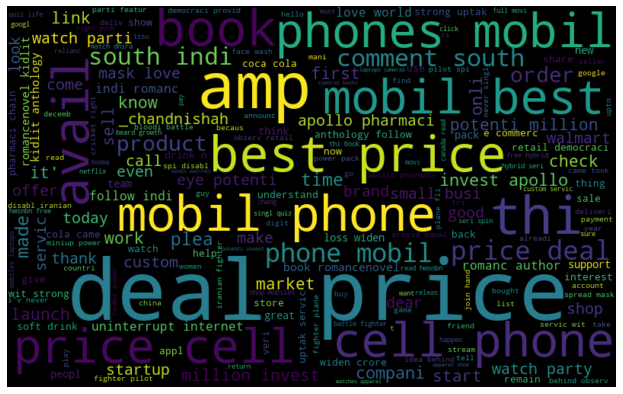

In [36]:
## Understanding the common words used in the tweets: WordCloud
all_words = ' '.join([text for text in df['text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
#Amazon India

#### Amazon India
We can see most of the words are positive or neutral. With best and deal being the most frequent ones. 
It doesn’t give us any idea about the words associated with negative sentiment or positive sentiment.
 Hence, we will plot separate wordclouds for both the classes(negative/positive) in our train data.

### Flipkart common words used in the tweets by WordCloud

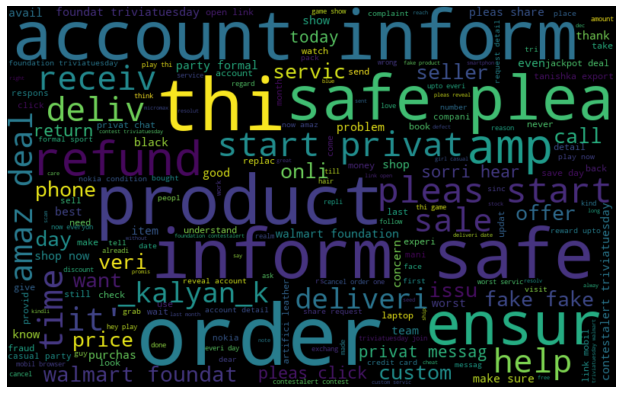

In [37]:
## Understanding the common words used in the tweets: WordCloud
all_words1 = ' '.join([text for text in df1['text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words1)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
#Flipkart

#### Flipkart
We can see fix of words of negative and positive sentiment. With product and safe being the most frequent ones. It doesn’t give us any idea about the words associated with negative sentiment or positive sentiment. Hence, we will plot separate wordclouds for both the classes(negative/positive) in our train data.

### Snapdeal common words used in the tweets by WordCloud

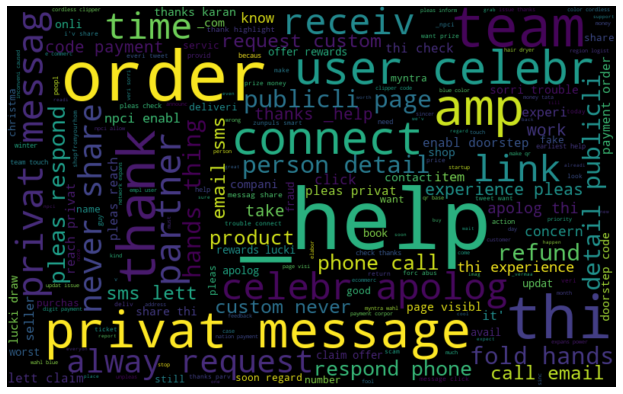

In [38]:
## Understanding the common words used in the tweets: WordCloud
all_words2 = ' '.join([text for text in df2['text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words2)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
#Snapdeal

#### Snapdeal
We can see fix of sentiment. With help being the most frequent ones. It doesn’t give us any idea about the words associated with negative sentiment or positive sentiment. Hence, we will plot separate wordclouds for both the classes(negative/positive) in our train data.

In [39]:
# create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#create 2 new column
df['Subjectivity'] = df['text'].apply(getSubjectivity)
df['Polarity'] = df['text'].apply(getPolarity)

#show the new dataframe with the new columns 
df.head()   #Amazon India

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status,Subjectivity,Polarity
0,agntsmith007,NaN,TweetDeck,NaN,12/14/2020 13:34,True,59,_progress kinda wrong. world run servic micros...,1,False,0.900,-0.500
1,shyamsu12147458,NaN,Twitter Web App,NaN,12/14/2020 13:28,False,9,from your taken money return mobil phone,0,False,0.000,0.000
2,globallifechurc,St.thomas,Twitter Web App,NaN,12/14/2020 13:23,True,3250,"befor make your goal year read book ""sweet aro...",0,False,0.325,0.325
3,CNBCTV18News,NaN,Twitter Media Studio,NaN,12/14/2020 13:23,True,202,*ola world' largest e-scoot factori tamil nadu...,0,False,0.000,0.000
4,chandramani1991,NaN,Twitter for Android,NaN,12/14/2020 13:22,False,492,allow sell made chines mobil,0,False,0.000,0.000


In [40]:
#create 2 new column
df1['Subjectivity'] = df1['text'].apply(getSubjectivity)
df1['Polarity'] = df1['text'].apply(getPolarity)

#show the new dataframe with the new columns
df1.head()         #Flipkart

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status,Subjectivity,Polarity
0,LotiyaPathaan,"Delhi, India",Twitter for Android,NaN,2020-12-22 13:09:56,True,126,just parrot repli with substanc them. that' ev...,0,False,0.0,0.0
1,Janice21833065,NaN,Twitter Web App,NaN,2020-12-22 13:09:12,False,3,multicolor &amp; women sling &amp; women sling,0,False,0.0,0.0
2,getfreedeal,India,getfreedeals,NaN,2020-12-22 13:09:11,False,64,home bazaar solid wood home templ upto,0,False,0.1,0.0
3,k91135328,NaN,Twitter for Android,NaN,2020-12-22 13:09:01,True,539,thi thief compani,0,False,0.0,0.0
4,mohankrishnak1,banglore,Twitter Web App,NaN,2020-12-22 13:08:56,False,269,poor optim softwar poco launcher..poco need so...,0,False,0.6,-0.4


In [41]:
#create 2 new column
df2['Subjectivity'] = df2['text'].apply(getSubjectivity)
df2['Polarity'] = df2['text'].apply(getPolarity)

#show the new dataframe with the new columns
df2.head()              #sanpdeal

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status,Subjectivity,Polarity
0,samyoga_20,ಕನ್ನಡ ನೆಲ- ಕರ್ನಾಟಕ,Twitter for Android,NaN,2020-12-22 13:37:04,False,543,expect item today tomorrow last. it' worth that.…,0,False,0.083333,0.15
1,panasiabiz,NaN,Revive Social App,NaN,2020-12-22 13:11:56,False,165,intex aqua star with lollipop avail,0,False,0.000000,0.00
2,thecouono,India,Twitter for Android,NaN,2020-12-22 13:04:05,False,0,partner with npci enabl doorstep code payment ...,0,False,0.000000,0.00
3,SadiiyaMemon,"London, England",Twitter for Android,NaN,2020-12-22 12:38:36,True,110,_doucett,0,False,0.000000,0.00
4,Snapdeal_Help,India,OneDirect Suite - P,NaN,2020-12-22 11:56:50,False,1418,sorri disappoint you. pleas “privat message” y...,0,False,0.000000,0.00


In [42]:
#create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

df.head()              #Amazon India

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status,Subjectivity,Polarity,Analysis
0,agntsmith007,NaN,TweetDeck,NaN,12/14/2020 13:34,True,59,_progress kinda wrong. world run servic micros...,1,False,0.900,-0.500,Negative
1,shyamsu12147458,NaN,Twitter Web App,NaN,12/14/2020 13:28,False,9,from your taken money return mobil phone,0,False,0.000,0.000,Neutral
2,globallifechurc,St.thomas,Twitter Web App,NaN,12/14/2020 13:23,True,3250,"befor make your goal year read book ""sweet aro...",0,False,0.325,0.325,Positive
3,CNBCTV18News,NaN,Twitter Media Studio,NaN,12/14/2020 13:23,True,202,*ola world' largest e-scoot factori tamil nadu...,0,False,0.000,0.000,Neutral
4,chandramani1991,NaN,Twitter for Android,NaN,12/14/2020 13:22,False,492,allow sell made chines mobil,0,False,0.000,0.000,Neutral


In [43]:
df1['Analysis'] = df1['Polarity'].apply(getAnalysis)

df1.head()                  #Flipkart

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status,Subjectivity,Polarity,Analysis
0,LotiyaPathaan,"Delhi, India",Twitter for Android,NaN,2020-12-22 13:09:56,True,126,just parrot repli with substanc them. that' ev...,0,False,0.0,0.0,Neutral
1,Janice21833065,NaN,Twitter Web App,NaN,2020-12-22 13:09:12,False,3,multicolor &amp; women sling &amp; women sling,0,False,0.0,0.0,Neutral
2,getfreedeal,India,getfreedeals,NaN,2020-12-22 13:09:11,False,64,home bazaar solid wood home templ upto,0,False,0.1,0.0,Neutral
3,k91135328,NaN,Twitter for Android,NaN,2020-12-22 13:09:01,True,539,thi thief compani,0,False,0.0,0.0,Neutral
4,mohankrishnak1,banglore,Twitter Web App,NaN,2020-12-22 13:08:56,False,269,poor optim softwar poco launcher..poco need so...,0,False,0.6,-0.4,Negative


In [44]:
df2['Analysis'] = df2['Polarity'].apply(getAnalysis)

df2.head()                    #snapdeal

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status,Subjectivity,Polarity,Analysis
0,samyoga_20,ಕನ್ನಡ ನೆಲ- ಕರ್ನಾಟಕ,Twitter for Android,NaN,2020-12-22 13:37:04,False,543,expect item today tomorrow last. it' worth that.…,0,False,0.083333,0.15,Positive
1,panasiabiz,NaN,Revive Social App,NaN,2020-12-22 13:11:56,False,165,intex aqua star with lollipop avail,0,False,0.000000,0.00,Neutral
2,thecouono,India,Twitter for Android,NaN,2020-12-22 13:04:05,False,0,partner with npci enabl doorstep code payment ...,0,False,0.000000,0.00,Neutral
3,SadiiyaMemon,"London, England",Twitter for Android,NaN,2020-12-22 12:38:36,True,110,_doucett,0,False,0.000000,0.00,Neutral
4,Snapdeal_Help,India,OneDirect Suite - P,NaN,2020-12-22 11:56:50,False,1418,sorri disappoint you. pleas “privat message” y...,0,False,0.000000,0.00,Neutral


In [45]:
# print all of the positive tweets of Amazon India
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j)+') '+sortedDF['text'][i])
        print()
        j = j+1

1) befor make your goal year read book "sweet aroma success"

2) usa; brazil canada read hwsnbn free hybrid seri spin-off

3) cricket right push

4) fast back furnish polyest eyelet piec door curtain feet, brown@

5) pick peopl buy from special people. good.sound

6) veri best day thenth idea behind observ retail democraci provid equal opportunity…

7) veri best day thenth idea behind observ retail democraci provid equal opportunity…

8) wholesal suprem bazaar stainless steel towel ring holder (silver) -set

9) veri best your schedul like thi idea behind observ retail democraci provid equal

10) veri best day thenth idea behind observ retail democraci provid equal opportu…

11) see tube down netflix most happi kyoki unh pata bore isk liye…

12) googl just tell facebook appl consum that real power still with google.

13) today' repli request updat ::hello, sharath from social media team .we…

14) $amzn look expand cricket program countri where game enjoy huge popularity…

15) #googledow

782) #sooraraipottru most most &amp; like most…

783) most most &amp; like most comment south indi…

784) #sooraraipottru most most &amp; like most…

785) most most &amp; like most comment south indi…

786) most most &amp; like most comment south indi…

787) most most &amp; like most comment south indi…

788) most most &amp; like most comment south indi…

789) most most &amp; like most comment south

790) most most &amp; like most comment south indi…

791) most most &amp; like most comment south indi…

792) most most &amp; like most comment south indi…

793) most most &amp; like most comment south indi…

794) most most &amp; like most comment south indi…

795) most most &amp; like most comment south indi…

796) most most &amp; like most comment south indi…

797) most most &amp; like most comment south indi…

798) most most &amp; like most comment south indi…

799) most most &amp; like most comment south indi…

800) most most &amp; like most comment south indi…

801) most most &amp; lik

In [46]:
# print all of the positive tweets of Flipkart
j = 1
sortedDF1 = df1.sort_values(by=['Polarity'])
for i in range(0, sortedDF1.shape[0]):
    if(sortedDF1['Analysis'][i] == 'Positive'):
        print(str(j)+') '+sortedDF1['text'][i])
        print()
        j = j+1

1) tire find perfect spot your hous where wifi strongest? back comfort with these

2) same issu then tri with differ account success order…

3) ensur that your account inform safe, pleas start privat chat with clicki…

4) what guy given promot didn't &amp; normal price

5) spag herbal premium bhringraj powder.bhringraj powder known effect action hair scalp.for

6) would make sure that resolut problem promis timeline? it' been months+…

7) thi winter be trendsetter, awesom classic collect women' cardigans. offici

8) doubt best can't even match bit.alway &gt;&gt;&gt;&gt;&gt;&gt;&gt;

9) right look thi #ranbirkapoor look stone ??hat

10) dear your do veri good manufactures, pleas show some light toward farmers…

11) be social media platform ensur that your account inform safe, pleas…

12) show soon #datingaajk super energeticstar your #cupid find perfectt…

13) _akshat ensur that your account inform safe, request reach messag…

14) privat messag click here make sure that your account inf

531) first resolv issu then check whether when need share account detail

532) pond super light moisturis

533) motorola phone bought huge discounts; great offer #motorola #moto

534) thank prompt action. today receiv item. thank happi with your service.

535) dear thi your loyal custom from ever sinc stop delivery(obvi promte…

536) save day here! maxim your save with best deal your favourit wildcraft product

537) small business, impact! from sweet shop owner hissar provis store manag bengaluru,

538) enjoy impress batteri life premium qualiti ⌚amazfit smartwatch⌚click here

539) ensur that your account inform safe, pleas start privat messag with clic…

540) never expect thi kind servic from they deliv product which have never recieved.

541) grab extraa buck from your #shopping!! save sale more save more #deals: buy…

542) ensur that your account inform safe, pleas messag click

543) make sure that your account inform safe. await your response.

544) ensur that your account inform s

In [47]:
# print all of the positive tweets of snapdeal
j = 1
sortedDF2 = df2.sort_values(by=['Polarity'])
for i in range(0, sortedDF2.shape[0]):
    if(sortedDF2['Analysis'][i] == 'Positive'):
        print(str(j)+') '+sortedDF2['text'][i])
        print()
        j = j+1

1) expect item today tomorrow last. it' worth that.…

2) better creat invoic gener setup with platform name. veri pathet protoc are…

3) i’v share thi with team. we'll connect with soon regard this. thanks!

4) request "privat message" your exact concern that assist better

5) wish purchas these superb appl rainbow logo stickers, bought from you…

6) both number work fine receiv mail that both number reachable. it' such

7) thank sir,#journ #social #media #new #political#breakingnew #bollywood #mumbainews…

8) sincer regret know this. get thi check ensur thi sort priority. thanks!

9) _vermaa _help didn't refund from months. have take strict action cyber

10) _vermaa thank highlight this. realli appreci your efforts. we'll sure have thi check and…

11) excit proud announc line-up speaker panelist annual conference. tickets…

12) i'v share thi with team. we'll connect with soon regard this. thanks!

13) _help pleas take action quick.thank

14) receiv thi over post. just want know thi ge

### Positive most frequent words used by Amazon India customer

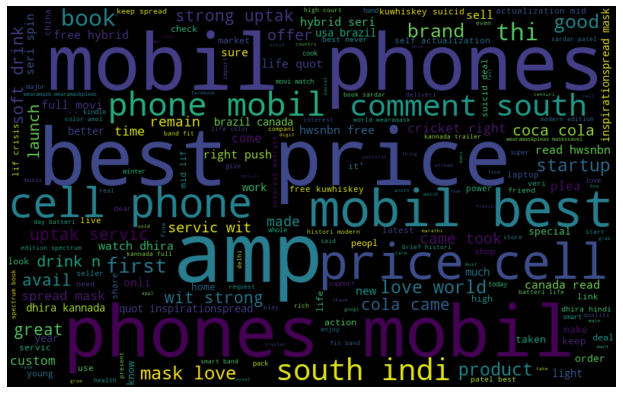

In [48]:
# Words in positive tweets
normal_words =' '.join([texts for texts in df['text'][df['Analysis'] == 'Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
#Amazon India

#### Amazon India
* We can see most of the words are positive. With best, price, and online being the most frequent ones. Hence, most of the frequent words are compatible with the sentiment which is positive tweets. Similarly, we will plot the word cloud for the other sentiment. Expect to see negative sentiment words.
* Mobiles phone is the highest selling product on Amazon India

### Positive most frequent words used by Flipkart customer

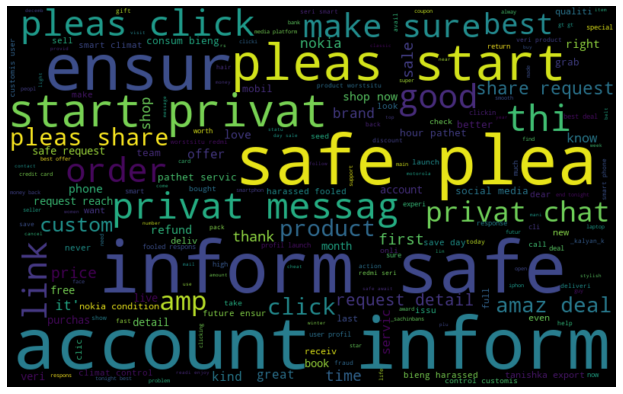

In [49]:
# Words in positive tweets
normal_words1 =' '.join([texts for texts in df1['text'][df1['Analysis'] == 'Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words1)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
#Flipkart

#### Flipkart
* We can see most of the words are positive. With safe, good, and best being the most frequent ones. Hence, most of the frequent words are compatible with the sentiment which is positive tweets. Similarly, we will plot the word cloud for the other sentiment. Expect to see negative sentiment words.
* we can nokia is mention tweet is because nokia launch product few week back on flipkart.

### Positive most frequent words used by Snapdeal customer

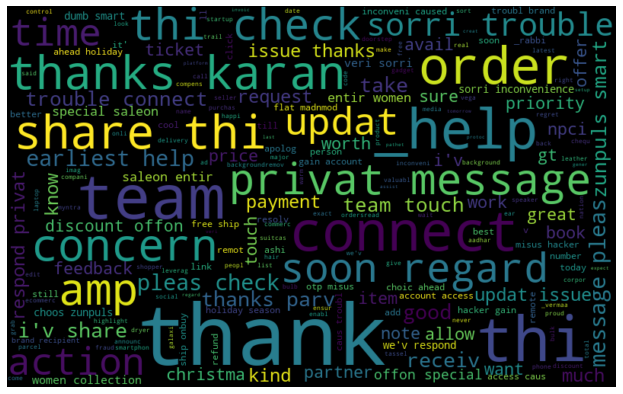

In [50]:
# Words in positive tweets
normal_words2 =' '.join([texts for texts in df2['text'][df2['Analysis'] == 'Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words2)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
#snapdeal

#### Snapdeal
* We can see few words are positive and few are negative. It can be because positive and negative words is mention in one sentence, but the polarity of sentence is more toward positive.
* With "thanks","good" being the most frequent ones. Hence, most of the frequent words are compatible with the sentiment which is positive tweets. Similarly, we will plot the word cloud for the other sentiment. Expect to see negative sentiment words.
* There is no mention of product for now.

In [51]:
#print the negative tweets of Amazon India
j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+ sortedDF['text'][i])
        print()
        j = j+1

1) _progress kinda wrong. world run servic microsoft azur services. outag some…

2) that doesn't mean they have nong product their rang search show onl…

3) intent behind retail democraci provid equal opportun just shot like walmar…

4) main idea behind observ retail democraci give equal opportun just walmart

5) main idea behind observ retail democraci give equal opportun just walmart

6) intent behind retail democraci provid equal opportun just shot like walmar…

7) retail democraci provid equal opportun just shot like walmart small

8) first know think idea behind observ retail democraci provid equal opp…

9) veri import that have idea behind observ retail democraci provid equal opport…

10) idea behind observ retail democraci provid equal opportun just shot like

11) idea behind observ retail democraci provid equal opportun just shot like

12) idea behind observ retail democraci provid equal opportun just shot like

13) veri least back first floor idea behind observ retail democrac

In [52]:
#print the negative tweets of Flipkart
j = 1
sortedDF1 = df1.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF1.shape[0]):
    if(sortedDF1['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+ sortedDF1['text'][i])
        print()
        j = j+1

1) poor optim softwar poco launcher..poco need some improv

2) worst servic from

3) your level servic your custom veri poor. product miss option

4) anyway cannot custom servic properly. least refund without errors.refund processed:…

5) it’ long want journey order your copi #crossyourhearttakemynam pleas click here:

6) need assist over queri complaint refund generate…

7) what mean earliest? it' been minut glu phone..

8) casual, party, formal, sport gold party, formal, sport gold clutch

9) casual, party, formal, sport yellow party, formal, sport yellow clu…

10) absolut worst!!! they deliv wrong product then when return they keep giving…

11) party, formal, casual maroon, gold formal, casual maroon, gold clutch

12) mani complaint regd custom solut provid .mean total

13) receiv wrong fake product dure sale. cancel pending. regret purchas dure sale

14) final prove that fail serv valuabl custom

15) mani complaint done solut provid .mean total bakwa custom care

16) order didn't d

273) common problem numbers...onli have complet have stop use the…

274) worst websit selling. staff thief. everi

275) amaz deal you!lenovo legion game laptop window inch (model

276) alreadi rais complaint regard technic glitch which

277) worst servic from ...mi order worth instantli cancelled..bt have…

278) loot billion sweatshirtscrol down mani optionslink:

279) amaz deal you!philip round bulb just from shop now!…

280) loot billion sweatshirtscrol down mani option

281) when weather grow cold, need companion mazboot! mazboot kursi matlab avro kursi shop now!amaz…

282) what updat deliveri laptop that have paid hard earn

283) buyer' kindli note complet deliveri promise.do fake promis delivery.e…

284) thi incid differ resolut reciev different. worst

285) thi worst experi with order deliveri date extend again again. chec…

286) thi fake. don't believ thi

287) #paytmwishlistanswers.... fake fake

288) order bluetooth headphon from whose parcel empty, what do?miss product..

289

In [53]:
#print the negative tweets of Snapdeal
j = 1
sortedDF2 = df2.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF2.shape[0]):
    if(sortedDF2['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+ sortedDF2['text'][i])
        print()
        j = j+1

1) sorri trouble. your concern been escal contact team

2) don't purchas anyth from they provid second copyand worst servic provid

3) _help what' happen seller panel? it' work long

4) today announc that ad seller manufacturers, offer wide varieti assor…

5) thi christmas, readi have healthi nutriti treat with wide rang snacks. gluten-fre…

6) _help mere order refund chay bssss full faltu aapka ooor faltu

7) wise one, would amaz your stupid compani would stop send explicit detail

8) _help doe your stupid compani allow fake custom creat

9) flop show team. yesterday deliveri failed. today deliveri fail receiv message.

10) _help what fuck happen fraud messag hour thi work

11) servic provid without know issu they keep copi past same mail

12) certainli understand your disappointment. we'r close follow thi soon you'll hear

13) snapchat mana countri poor annadu.aith star ichedama

14) #news: partner with _npci base digit payment orders.# #digital…

15) pleas elabor what went wrong pri

### Negetive most frequent words used by Amazon India customer

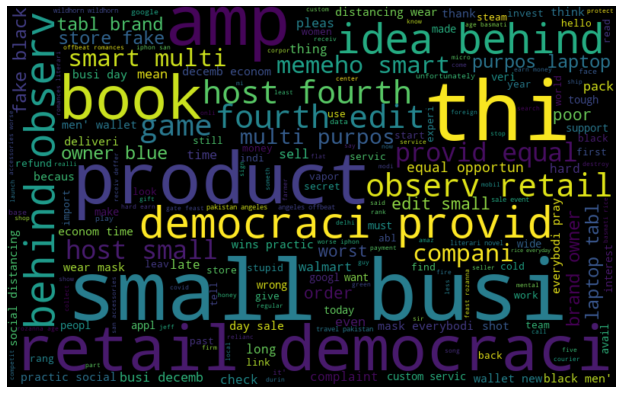

In [54]:
# words in Negative Tweets
negative_words = ' '.join([texts for texts in df['text'][df['Analysis'] == 'Negative']])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Here we can see some interesting words such as 'fake','poor','small business','democraci','laptop'. some words show some recent trends going in india and few are negative.
As we can clearly see, most of the words have negative connotations. So, it seems we have a pretty good text data to work on. Next we will the hashtags/trends in our twitter data.
* lets analysis some words
* 'fake' word is regarding the product sell by seller and people did not like that product. action is needed.
* 'worst' word is used show sentiment regarding the customer service support given by amazon. which should be improved.
* 'poor' setiment is regarding the after sale customer service and quality of the product.
* 'small business' or 'small' is setiment express by people for indian farmer regarding the current protest going on against 3 farmer bill.
* there is the 'retail democracy day' intruduces by (CAIT) on 15december. People mostly tweeted against amazon,walmart
* most people describe the content of book which is negative, but few have complaint about quality of book.


### Negetive most frequent words used by Flipkart customer

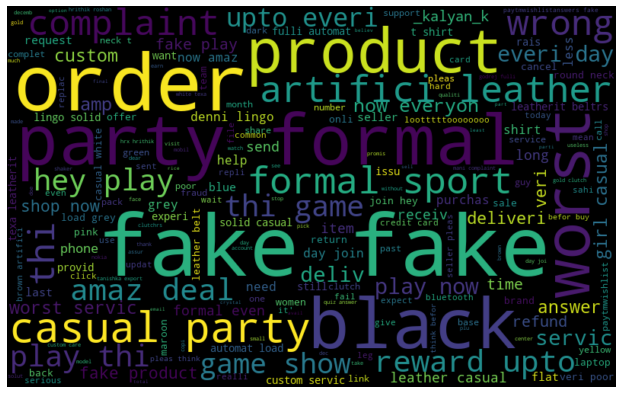

In [55]:
# words in Negative Tweets
negative_words1 = ' '.join([texts for texts in df1['text'][df1['Analysis'] == 'Negative']])
wordcloud1 = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words1)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis('off')
plt.show()

Here we can see some interesting words such as 'fake','wrong','complaint','artificial','worst service'.
* Lets analysis some words
* 'fake' is most occuring word is regarding the product sell by seller and people did not like that product. action is needed
* During the Diwali sale due to high number of order placed by customer and flipkart was not able to handle the delivery. The 'wrong' product was delivery to customer during that period of time.
* There are few tweet regarding the 'worst' customer service. Its mainly due to refund and high number of call and mail to customer service which was not able to handle during sale.
* Due to no immediate solution, customer had written complain against refund for wrong delivery of product.
* we can see customer has mention 'articial leather'. It because the leather product are fake not genuine. so people tweet regarding the product.
* while complaining the order detail is needed. so customer has mention 'order' id during complaining.
* 'Black' is just a reference to color of product.
* 'party' is referend to speaker. which is party speaker.
* There was the game which can be played on flipkart website for customer and win some reward. which people didn't like.

### Negetive most frequent words used by Snapdeal customer

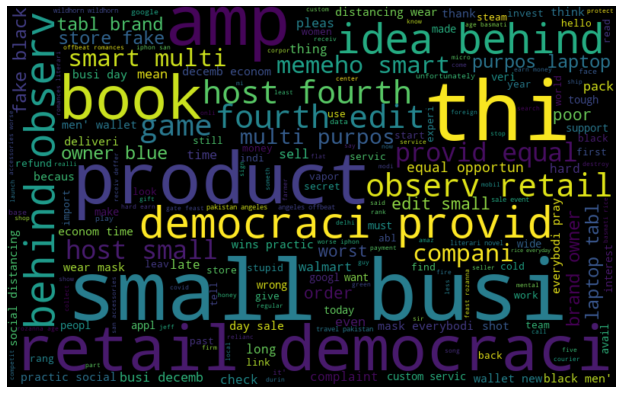

In [56]:
# words in Negative Tweets
negative_words2 = ' '.join([texts for texts in df2['text'][df2['Analysis'] == 'Negative']])
wordcloud2 = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis('off')
plt.show()

Here we can see some interesting words such as 'small business','retail democracy','fake','laptop','table','worst service','wrong'.
* there is the 'retail democracy day' intruduces by (CAIT) on 15december. People mostly tweeted against amazon,walmart.
* 'small business' or 'small' is setiment express by people for indian farmer regarding the current protest going on against 3 farmer bill.
* most people describe the content of book which is negative, but few have complaint about quality of book.
* 'fake' word is regarding the product sell by seller and people did not like that product. action is needed.
* 'Poor' word is used regarding the after sale customer service.
* 'amp' word is regarding update on customer query by snapdeal.

## Understanding the impact of Hashtags on tweets sentiment
Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. We should try to check whether these hashtags add any value to our sentiment analysis task, i.e., they help in distinguishing tweets into the different sentiments

In [57]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [58]:
hash = hashtag_extract(df['text'])

In [59]:
res = list(filter(None, hash))          #Amazon India
res

[['googledown',
  'trend',
  'youtub',
  'android',
  'gmail',
  'retweet',
  'anim',
  'microsoft'],
 ['homeautom', 'hvac', 'socialmedia', 'trend', 'tech'],
 ['homeautom', 'hvac', 'socialmedia', 'trending'],
 ['internet', 'miniup'],
 ['googledown', 'youtubedown', 'snapchatdowndon'],
 ['nowplay'],
 ['acedefencehandsanitis'],
 ['weddinganniversari'],
 ['best', 'moistur'],
 ['discussshop'],
 ['miniup'],
 ['renewableenergy'],
 ['miniup'],
 ['cricket'],
 ['unbreaking'],
 ['cricket'],
 ['watch', 'style'],
 ['hyderabad'],
 ['spinandwin'],
 ['spinandwin'],
 ['farm', 'farmers'],
 ['reflect'],
 ['proudtoben'],
 ['internet', 'staysaf', 'stayathome'],
 ['tech', 'techsupport'],
 ['pay', 'loss'],
 ['dhira', 'dhira'],
 ['dhira', 'dhira'],
 ['dhira', 'dhira'],
 ['spinandwin'],
 ['gpdeshpandeto'],
 ['physic'],
 ['quiz'],
 ['marketstrategi', 'investmentstrategy'],
 ['sap'],
 ['startup'],
 ['agil', 'scrum', 'projectmanag', 'book'],
 ['countri'],
 ['amzn', 'amzn'],
 ['familyseri', 'bookseries'],
 ['famil

In [60]:
hash1 = hashtag_extract(df1['text'])                    #Flipkart
res1 = list(filter(None, hash1))
res1

[['boycottjiosim', 'scam'],
 ['triviatuesday'],
 ['allbogu', 'shittyservic'],
 ['nokia', 'nokiaac'],
 ['triviatuesday', 'contestalert'],
 ['crossyourhearttakemynam'],
 ['ranbirkapoor'],
 ['triviatuesday'],
 ['contestalert', 'triviatuesday'],
 ['triviatuesday'],
 ['paytmwishlist', 'gamers', 'quiz'],
 ['pahal'],
 ['triviatuesday'],
 ['triviatuesday'],
 ['datingaajk', 'cupid'],
 ['contestalert', 'contest', 'triviatuesday'],
 ['triviatuesdaysjoin'],
 ['triviatuesday'],
 ['fasttrackssrcas'],
 ['digitalmarketing'],
 ['triviatuesday'],
 ['contestalert', 'triviatuesday'],
 ['triviatuesday'],
 ['contestalert', 'contest', 'triviatuesday'],
 ['triviatuesday'],
 ['triviatuesday'],
 ['triviatuesday'],
 ['triviatuesday'],
 ['triviatuesday'],
 ['contestalert', 'contest', 'triviatuesday'],
 ['triviatuesday'],
 ['triviatuesday', 'contestalert'],
 ['triviatuesday'],
 ['triviatuesday'],
 ['contestalert', 'triviatuesday'],
 ['triviatuesday'],
 ['contestalert', 'triviatuesdays'],
 ['contestalert', 'triviat

In [61]:
hash2 = hashtag_extract(df2['text'])                      #Snapdeal
res2 = list(filter(None, hash2))
res2

[['npci', 'ecommerc', 'startups'],
 ['journ',
  'social',
  'media',
  'new',
  'political',
  'breakingnew',
  'bollywood',
  'mumbainews'],
 ['gaurancefragrances',
  'eaudeperfum',
  'frenchfragrance',
  'fragranceformen',
  'fragranceforwomen'],
 ['monesday', 'loafer', 'womensfashion', 'shoes'],
 ['shopfromyourhom'],
 ['myntra', 'fashion', 'shop'],
 ['pressrelease'],
 ['backgroundremov', 'background'],
 ['backgroundremov', 'background'],
 ['kunalbahl', 'rohitbansal'],
 ['quiltedbag', 'bags'],
 ['gaurancefragr', 'scentkraft'],
 ['news', 'deliveri', 'pincod'],
 ['deliveri', 'pincod'],
 ['news', 'digital'],
 ['sunday'],
 ['fashiontech', 'newlaunch', 'fashionretail'],
 ['book'],
 ['eco_friendly_chritma'],
 ['marketplace', 'digitalpay'],
 ['gaurancefragr', 'deals'],
 ['currentaffair'],
 ['triar', 'rheia', 'tenderu', 'sanitarynapkin'],
 ['women', 'handglov', 'coronavaccin'],
 ['shopfromyourhom'],
 ['ncpi', 'digitalpay'],
 ['zunpuls'],
 ['ozon', 'fnac', 'otto', 'myntra', 'gittig'],
 ['shop

In [62]:
# extracting hashtags from positive tweets of Amazon India

HT_positive = hashtag_extract(df['text'][df['Analysis'] == 'Positive'])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(df['text'][df['Analysis'] == 'Negative'])

# unnesting list
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])

In [63]:
# extracting hashtags from positive tweets of Flipkart

HT_positive1 = hashtag_extract(df1['text'][df1['Analysis'] == 'Positive'])

# extracting hashtags from racist/sexist tweets
HT_negative1 = hashtag_extract(df1['text'][df1['Analysis'] == 'Negative'])

# unnesting list
HT_positive1 = sum(HT_positive1,[])
HT_negative1 = sum(HT_negative1,[])

In [64]:
# extracting hashtags from positive tweets of Snapdeal

HT_positive2 = hashtag_extract(df2['text'][df2['Analysis'] == 'Positive'])

# extracting hashtags from racist/sexist tweets
HT_negative2 = hashtag_extract(df2['text'][df2['Analysis'] == 'Negative'])

# unnesting list
HT_positive2 = sum(HT_positive2,[])
HT_negative2 = sum(HT_negative2,[])

Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top n hashtags. So, first let’s check the hashtags in the positive tweets.

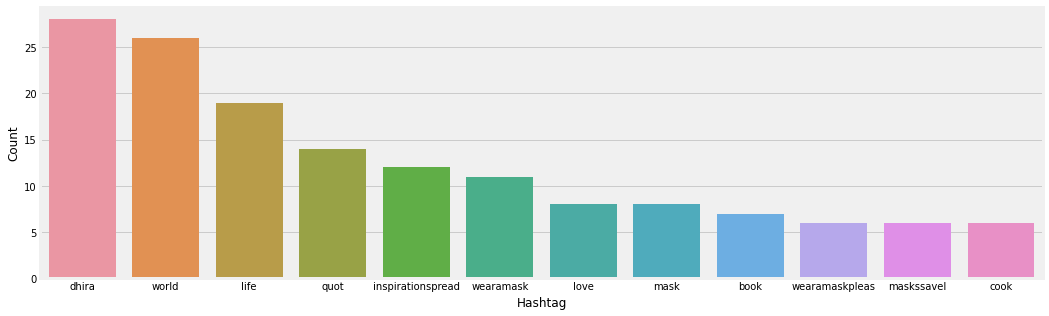

In [66]:
#Positive tweet hashtag of Amazon India
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 12) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()
#Amazon India

All these hashtags are positive and it makes sense. I am expecting negative terms in the plot of the second list.

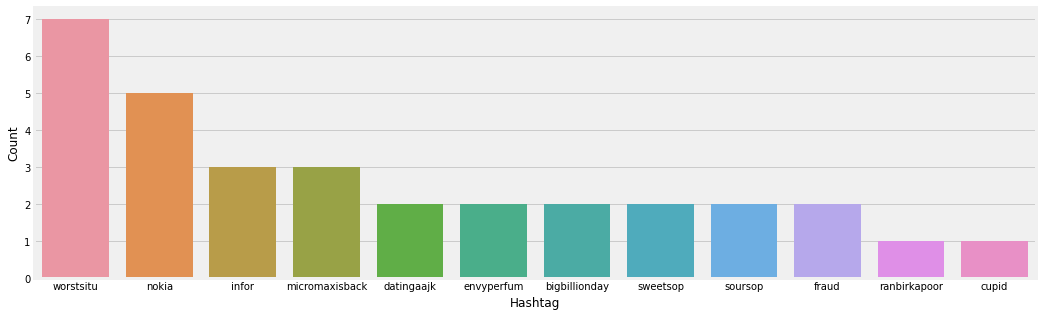

In [67]:
#Positive tweet hashtag
a1 = nltk.FreqDist(HT_positive1)
d1 = pd.DataFrame({'Hashtag': list(a1.keys()),
                  'Count': list(a1.values())})
# selecting top 10 most frequent hashtags     
d1 = d1.nlargest(columns="Count", n = 12) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d1, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()
#Flipkart

Here we can see some trends regarding "micromax" , "bigbillionday. our main focus will be negative sentiments.

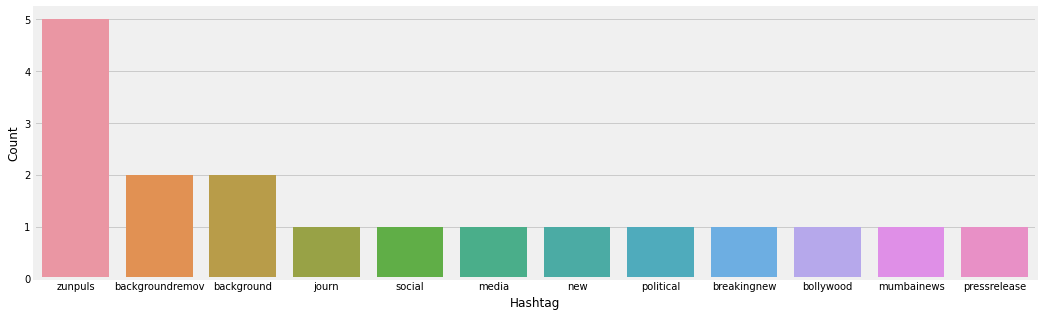

In [68]:
#Positive tweet hashtag
a2 = nltk.FreqDist(HT_positive2)
d2 = pd.DataFrame({'Hashtag': list(a2.keys()),
                  'Count': list(a2.values())})
# selecting top 10 most frequent hashtags     
d2 = d2.nlargest(columns="Count", n = 12) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d2, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()
# snapdeal

Here most of tag are trends. which is not related to eccomerce

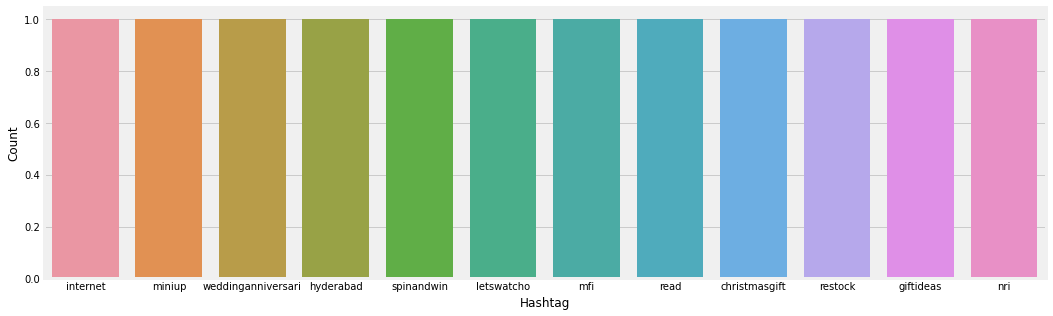

In [69]:
#Negative Tweets hashtag
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 12)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()
#Amazon India

As expected, most of the terms are negative with a few neutral terms as well. So, it’s not a bad idea to keep these hashtags in our data as they contain useful information.
* #Amazon #India is used with lots of negative words, so it is showing negative.
* #internet was used with negative sentiment because there was a slow down of internet and people get confused that the amazon eccomerce server is down.
* #MiniUPS is Online UPS for Wi-Fi router thus do not require switching between two paths in case of power failure. people used this with negative sentiment when the internet was down.
* #weddinganniversary #hyderabad is used with negative words such as slow. so it showing in negative setiment
* #amazonspinandwin is game can be played on eccomerce website. which people does not like it.
* #letswatcho is a contest played on amazon to win voucher. which people does not like it.

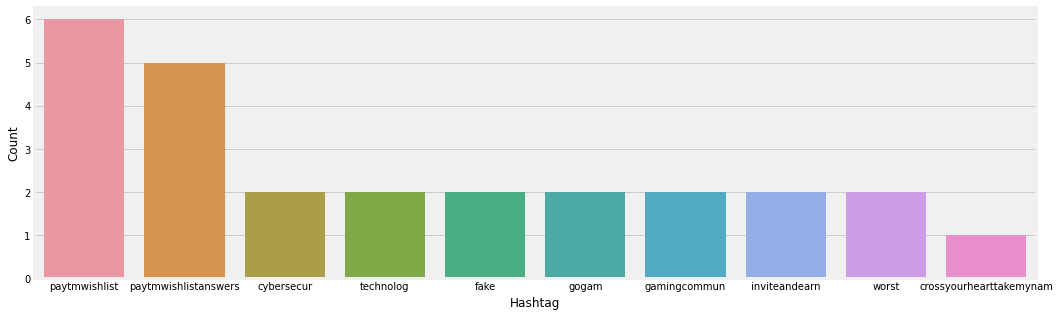

In [70]:
#Negative Tweets hashtag
b1 = nltk.FreqDist(HT_negative1)
e1 = pd.DataFrame({'Hashtag': list(b1.keys()), 'Count': list(b1.values())})
# selecting top 10 most frequent hashtags
e1 = e1.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e1, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()
#Flipkart

Lets decode the Tag
* customer who pay bill through 'paytm' to earn rewards and people who orders cancel is facing difficulty for refund. so customer used twitter to raise their issue
* people mention cybersecurity issue which is from china.
* 'fake' word is regarding the product sell by seller and people did not like that product. Its the after sell issue. which should be solve return policy.
* There are few tweet regarding the 'worst' customer service. Its mainly due to refund and high number of call and mail to customer service which was not able to handle during sale.

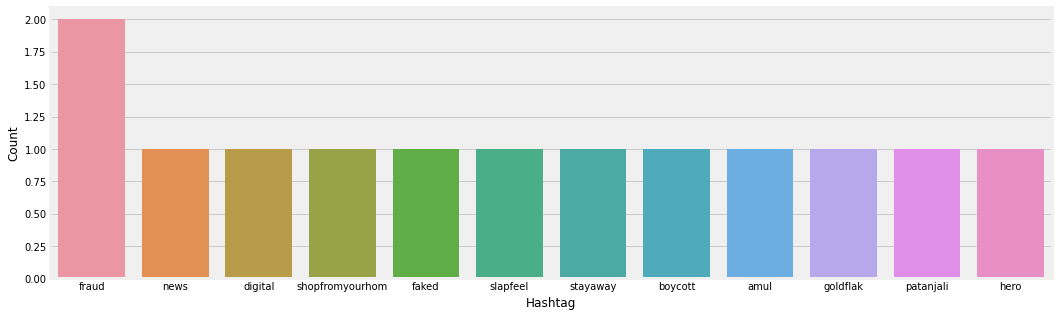

In [71]:
#Negative Tweets hashtag of snapdeal
b2 = nltk.FreqDist(HT_negative2)
e2 = pd.DataFrame({'Hashtag': list(b2.keys()), 'Count': list(b2.values())})
# selecting top 10 most frequent hashtags
e2 = e2.nlargest(columns="Count", n = 12)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e2, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()
#snapdeal

* Fraudsters are using snapdeal with details to commit fraud with snapdeal customers.
* news is regarding what new is going on with snapdeal policy.
* digital is used with term payment.
* 'fake' word is regarding the product sell by seller and people did not like that product. Its the after sell issue. which should be solve return policy.
* 'stayaway' tag is used to warn other people regarding the fake product is selling via snapdeal.
* customer are showing angry toward brand snapdeal for after sale service.

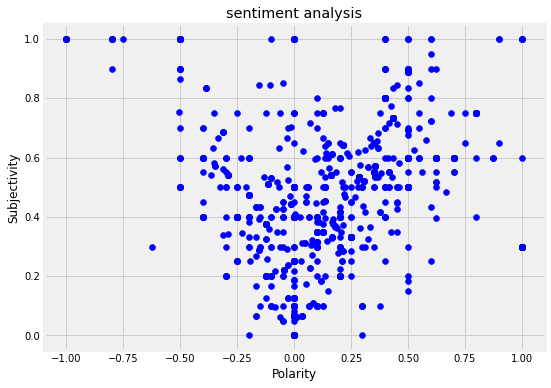

In [72]:
# plot the polarity and subjectivity of Amazon India
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
    
plt.title('sentiment analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()
# Amazon India

*  Majority of people fall near the neutral and positive sentiment. which is the good indicator for any brand.
* subjectivity ranges from (0 - 1) and toward 1 represent subjectivity (opinion), toward 0 represent objectivity (fact).
* Here we can see majority of customers talking on fact based and few customers tweet fall toward opinion.

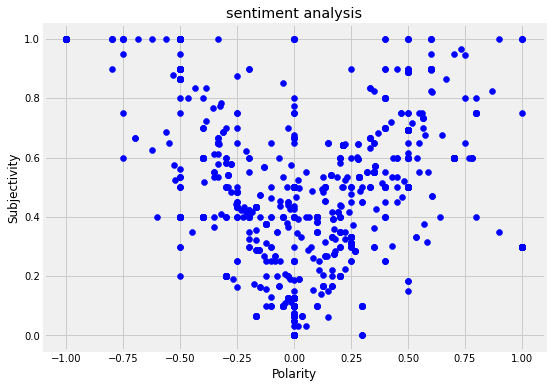

In [73]:
# plot the polarity and subjectivity of flipkart
plt.figure(figsize=(8,6))
for i in range(0, df1.shape[0]):
    plt.scatter(df1['Polarity'][i], df1['Subjectivity'][i], color='Blue')
    
plt.title('sentiment analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()
#Flipkart

* Majority of people fall near the neutral sentiment, but there are equal people tweets in positive and negative sentiment.
* This is the worrying trends.
* subjectivity ranges from (0 - 1) and toward 1 represent subjectivity (opinion), toward 0 represent objectivity (fact).
* Here we can see majority of customers talking on fact based and few customers tweet fall toward opinion.

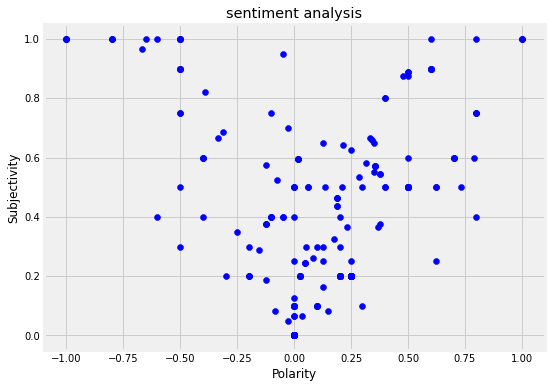

In [74]:
# plot the polarity and subjectivity of Snapdeal
plt.figure(figsize=(8,6))
for i in range(0, df2.shape[0]):
    plt.scatter(df2['Polarity'][i], df2['Subjectivity'][i], color='Blue')
    
plt.title('sentiment analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()
#Snapdeal

* As we can see there are very less tweet by people because snapdeal already lost lots of the customer due poor after sales service. 
* Majority of people fall near the neutral sentiment and negative sentiment.
* Snapdeal already pass the falling trends and lost the trust of customer.
* which will restrict snapdeal to grow again.
* subjectivity ranges from (0 - 1) and toward 1 represent subjectivity (opinion), toward 0 represent objectivity (fact).
* Here we can see majority of customers talking on fact based and very few customers tweet fall toward opinion.

In [75]:
# Get the percentage of positive tweets of Amazon India
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['text']

round( (ptweets.shape[0]/ df.shape[0]) *100, 1)
#Amazon India

28.2

In [76]:
# Get the percentage of positive tweets of Flipkart
ptweets1 = df1[df1.Analysis == 'Positive']
ptweets1 = ptweets1['text']

round( (ptweets1.shape[0]/ df1.shape[0]) *100, 1)
#Flipkart

23.5

In [77]:
# Get the percentage of positive tweets of snapdeal
ptweets2 = df2[df2.Analysis == 'Positive']
ptweets2 = ptweets2['text']

round( (ptweets2.shape[0]/ df2.shape[0]) *100, 1)
#snapdeal

27.2

In [78]:
# Get the percentage of negative tweets of Amazon India
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['text']

round(ntweets.shape[0]/ df.shape[0]*100, 1)
#Amazon India

9.2

In [79]:
# Get the percentage of negative tweets of Flipkart
ntweets1 = df1[df1.Analysis == 'Negative']
ntweets1 = ntweets1['text']

round(ntweets1.shape[0]/ df1.shape[0]*100, 1)
#Flipkart

14.8

In [80]:
# Get the percentage of negative tweets of Snapdeal
ntweets2 = df2[df2.Analysis == 'Negative']
ntweets2 = ntweets2['text']

round(ntweets2.shape[0]/ df2.shape[0]*100, 1)
#Snapdeal

10.7

#### Here we can see in term of number of positive, negative and neutra sentiment

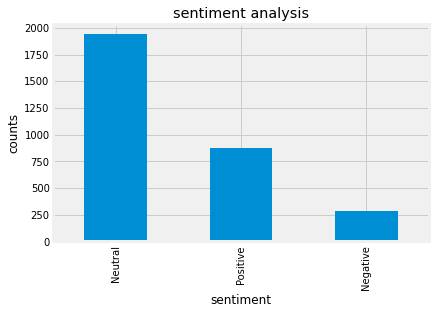

In [81]:
#show the value counts of Amazon India

df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('sentiment analysis')
plt.xlabel('sentiment')
plt.ylabel('counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()
#Amazon India

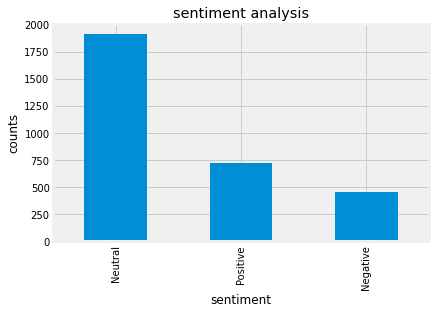

In [82]:
#show the value counts of Flipkart

df1['Analysis'].value_counts()

#plot and visualize the counts
plt.title('sentiment analysis')
plt.xlabel('sentiment')
plt.ylabel('counts')
df1['Analysis'].value_counts().plot(kind='bar')
plt.show()
#Flipkart

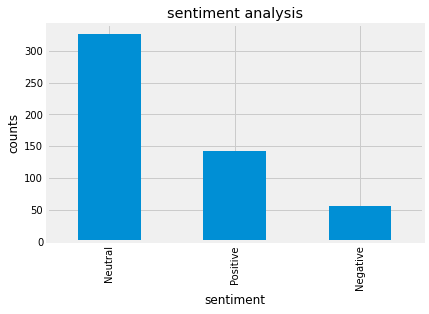

In [83]:
#show the value counts of snapdeal

df2['Analysis'].value_counts()

#plot and visualize the counts
plt.title('sentiment analysis')
plt.xlabel('sentiment')
plt.ylabel('counts')
df2['Analysis'].value_counts().plot(kind='bar')
plt.show()
#snapdeal

## Question which need to answer

## social media monitoring
1) online reputation of amazon india?
* --> Amazon customer has given 36.9% positive review for product and brand and majority of the customer neutral review 
    toward company. 11% customer has negative opinion toward amazon. we have to dig down

2) what are negative mentions given by customer toward product and service?
* --> The most common negative sentiment toward Amazon India, Flipkart and Snapdeal
    * 'fake' word is regarding the product sell by seller and people did not like that product. action is needed.
    * 'worst' word is used show sentiment regarding the customer service support given by amazon. which should be improved.
    * 'poor' setiment is regarding the after sale customer service and quality of the product.
    
3) what do customers love about ecommerce india?
* --> competitive pricing, beacuse customer has show highest sentiment toward words 'deal', 'price', 'discount'.

4) most valued aspects given by ecommerce customer?
* --> After sales service such customer service, return policy, genuine product.
    Aspect-based sentiment analysis with Twitter can show you which aspects of your business need to be improved and what makes
    you stand out among your competitors.


## customer service
1) evaluate the performance of your customer support on Twitter?
* -->Customer support is the huge issue in India. There are 22 languages spoken in India. It is not possible for common solution.
    * Used of technology is must to solve this issue such as deploying chatbot in regional languages.
   
2) customer satisfaction based on the type of feedback you receive?
* --> low level of customer satisfaction. Need for best after sales service for better customer satisfaction

## Market Research
1) Understanding what things potential customers like, what their behaviors are?
* --> After sales service is needed to attract potential customers and existing customers.

2) different motivations of there customer? and segment their market into different types of customer.
* --> saving money is one motivation during sales on festive season. 
     * coporate working class are the majar customer of ecommerce.
     * on weekend they are too lazy and tried on week after works. 
     * so they choose ecommerce to shop. Hence we see the Hashtag "#shopfromhome'. 
     * pandamic given the major push to ecommerce in India. we seen the trend in data such as unexpected high number of 
      order to flipkart, which lead to wrong deliver to customer.

## Brand Monitoring
1) track customer reactions on Twitter. Taking action and making changes or improvements in real-time will help maintain customer loyalty.
* --> loyal customer are the customer who had good after sales service experice.

## What are top most selling electronic product online and what are their sentiment toward that product?
1) Mobile phone is huge selling product from online and customer sentiment is positive toward mobile phone.

2) Laptop is huge selling electronic product and customer sentiment is positive to toward laptop.

3) wireless earphone is good selling product and customer sentiment is positive toward product.
    